In [1]:
import pandas as pd

pd.set_option('future.no_silent_downcasting', True)

X_train = pd.read_csv('../data/processed/X_train_house.csv')
y_train = pd.read_csv('../data/processed/y_train_house.csv')
X_test = pd.read_csv('../data/processed/X_test_house.csv')
y_test = pd.read_csv('../data/processed/y_test_house.csv')

In [2]:
X_train.shape

(5774, 26)

In [3]:
y_train.shape

(5774, 1)

In [4]:
X_test.shape

(1426, 26)

In [5]:
y_test.shape

(1426, 1)

In [6]:
X_train.duplicated().sum()

0

In [7]:
X_test.duplicated().sum()

0

## Multiple Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression

multi_linear_reg = LinearRegression()
multi_linear_reg.fit(X_train, y_train)


LinearRegression()

In [9]:
train_accuracy = multi_linear_reg.score(X_train, y_train)

train_accuracy

0.6830342737007767

### Test model

In [10]:
# y_pred_train = regressor.predict(X_train)
y_pred_test = multi_linear_reg.predict(X_test)


In [11]:
print(f"y_pred_test {y_pred_test}")
# print(f"y_pred_train {y_pred_train}")

y_pred_test [[ 183343.38264357]
 [ 312070.87568693]
 [1048991.67107462]
 ...
 [ 418956.24041258]
 [ 430384.33203557]
 [ 217553.94047415]]


In [12]:
accuracy = multi_linear_reg.score(X_test, y_test)
accuracy

0.6827798521099635

In [13]:
y_test

,Price
0,233000.0
1,382000.0
2,1250000.0
3,315000.0
4,545000.0
...,...
1421,468000.0
1422,435000.0
1423,415000.0
1424,360000.0


In [14]:
y_pred_test

array([[ 183343.38264357],
       [ 312070.87568693],
       [1048991.67107462],
       ...,
       [ 418956.24041258],
       [ 430384.33203557],
       [ 217553.94047415]])

In [15]:
for x, y in zip(y_test.values, y_pred_test):
    print(f"{x} - {y}")

[233000.] - [183343.38264357]
[382000.] - [312070.87568693]
[1250000.] - [1048991.67107462]
[315000.] - [617374.27163573]
[545000.] - [471014.02463645]
[259000.] - [312757.23652278]
[395000.] - [330958.07789092]
[389000.] - [504818.08368102]
[599000.] - [462317.63061801]
[237500.] - [210746.70307708]
[75000.] - [135988.25381028]
[135000.] - [186053.78795817]
[441407.] - [506423.93029815]
[199000.] - [356228.71672555]
[358900.] - [335246.24643798]
[369000.] - [387176.84477539]
[450000.] - [440469.8948568]
[240000.] - [201791.072558]
[376000.] - [420153.96152902]
[399995.] - [468892.59425518]
[252000.] - [352473.06129784]
[270000.] - [269031.68694934]
[399000.] - [458561.69793886]
[499000.] - [606845.0757686]
[675000.] - [677779.51940186]
[224000.] - [197338.78170684]
[299000.] - [292003.95290209]
[475000.] - [443076.24149559]
[300000.] - [390591.87434071]
[249000.] - [157806.93922401]
[219000.] - [179502.03860627]
[499000.] - [618982.69956306]
[499000.] - [330120.93173508]
[535000.] - [

In [16]:
X_train.columns

Index(['Facades', 'Habitable Surface', 'Land Surface', 'Bedroom Count',
       'Bathroom Count', 'Toilet Count', 'Room Count', 'Kitchen Type',
       'Furnished', 'Terrace', 'Garden Exists', 'State of Building',
       'Living Surface', 'EPC', 'Consumption Per m2', 'ANTWERPEN', 'BRUSSEL',
       'HENEGOUWEN', 'LIMBURG', 'LUIK', 'LUXEMBURG', 'NAMEN',
       'OOST-VLAANDEREN', 'VLAAMS-BRABANT', 'WAALS-BRABANT',
       'WEST-VLAANDEREN'],
      dtype='object')

In [17]:
X_test.columns

Index(['Facades', 'Habitable Surface', 'Land Surface', 'Bedroom Count',
       'Bathroom Count', 'Toilet Count', 'Room Count', 'Kitchen Type',
       'Furnished', 'Terrace', 'Garden Exists', 'State of Building',
       'Living Surface', 'EPC', 'Consumption Per m2', 'ANTWERPEN', 'BRUSSEL',
       'HENEGOUWEN', 'LIMBURG', 'LUIK', 'LUXEMBURG', 'NAMEN',
       'OOST-VLAANDEREN', 'VLAAMS-BRABANT', 'WAALS-BRABANT',
       'WEST-VLAANDEREN'],
      dtype='object')

## Ridge Regression

In [18]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [19]:
ridge_pred = ridge.predict(X_test)

In [20]:
accuracy = ridge.score(X_test, y_test)
accuracy

0.6827023534873424

In [21]:
mse = mean_squared_error(y_test, ridge_pred)
mse

12557999694.922052

## Lasso Regression

In [22]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=100)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=100)

In [23]:
lasso_pred = lasso_reg.predict(X_test)

In [24]:
accuracy = lasso_reg.score(X_test, y_test)
accuracy

0.6823532243036061

## Random Forest Regressor

In [25]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

rf_y_train = np.ravel(y_train)

random_forest_reg = RandomForestRegressor(n_estimators=400, random_state=42)
random_forest_reg.fit(X_train, rf_y_train)

RandomForestRegressor(n_estimators=400, random_state=42)

In [26]:
rf_y_pred = random_forest_reg.predict(X_test)

In [27]:
accuracy = random_forest_reg.score(X_test, y_test)
accuracy

0.7656561280293452

### Boosting Gradient Regressor

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

gb_y_train = np.ravel(y_train)

gradient_boosting_reg = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, random_state=42)
gradient_boosting_reg.fit(X_train, gb_y_train)

GradientBoostingRegressor(n_estimators=500, random_state=42)

In [29]:
gb_y_pred = gradient_boosting_reg.predict(X_test)

In [30]:
accuracy = gradient_boosting_reg.score(X_test, y_test)
accuracy

0.7686815010651065

## KNN Regressor

In [31]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=10)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [32]:
knn_y_pred = knn_reg.predict(X_test)

In [33]:
accuracy = knn_reg.score(X_test, y_test)
accuracy

0.40524922250722895

## Decision tree

In [34]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=500)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=500)

In [35]:
tree_y_pred = tree_reg.predict(X_test)

In [36]:
accuracy = tree_reg.score(X_test, y_test)
accuracy

0.5222928716845481

## Histogram Gradient Boosting Regressor

In [37]:
from sklearn.ensemble import HistGradientBoostingRegressor

hgbr_y_train = np.ravel(y_train)

hist_gradient_boosting_reg = HistGradientBoostingRegressor(loss='squared_error', learning_rate=0.1, random_state=42)
hist_gradient_boosting_reg.fit(X_train, hgbr_y_train)

HistGradientBoostingRegressor(random_state=42)

In [38]:
hgbr_y_pred = hist_gradient_boosting_reg.predict(X_train)

In [39]:
accuracy = hist_gradient_boosting_reg.score(X_test, y_test)
accuracy

0.7916025556318371

In [40]:
X_train

,Facades,Habitable Surface,Land Surface,Bedroom Count,Bathroom Count,Toilet Count,Room Count,Kitchen Type,Furnished,Terrace,...,BRUSSEL,HENEGOUWEN,LIMBURG,LUIK,LUXEMBURG,NAMEN,OOST-VLAANDEREN,VLAAMS-BRABANT,WAALS-BRABANT,WEST-VLAANDEREN
0,2.0,120.0,280.0,2.0,1.0,1.0,4.0,2.0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,3.0,184.0,1200.0,4.0,1.0,1.0,6.0,1.0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,2.0,115.0,187.0,3.0,1.0,1.0,5.0,3.0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,4.0,192.0,864.0,3.0,1.0,1.0,4.0,2.0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2.0,172.0,149.0,5.0,2.0,2.0,9.0,1.0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5769,2.0,215.0,259.0,4.0,1.0,2.0,5.0,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
5770,2.0,155.0,287.0,3.0,1.0,1.0,4.0,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
5771,4.0,220.0,494.0,4.0,1.0,2.0,5.0,1.0,0,1,...,0,0,0,0,0,0,0,1,0,0
5772,2.0,190.0,130.0,4.0,2.0,2.0,8.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
X_test.columns

Index(['Facades', 'Habitable Surface', 'Land Surface', 'Bedroom Count',
       'Bathroom Count', 'Toilet Count', 'Room Count', 'Kitchen Type',
       'Furnished', 'Terrace', 'Garden Exists', 'State of Building',
       'Living Surface', 'EPC', 'Consumption Per m2', 'ANTWERPEN', 'BRUSSEL',
       'HENEGOUWEN', 'LIMBURG', 'LUIK', 'LUXEMBURG', 'NAMEN',
       'OOST-VLAANDEREN', 'VLAAMS-BRABANT', 'WAALS-BRABANT',
       'WEST-VLAANDEREN'],
      dtype='object')

In [42]:
cat_features = ['Facades', 'Kitchen Type', 'Furnished', 'Terrace', 'Garden Exists', 'State of Building', 'EPC',
                'ANTWERPEN', 'BRUSSEL', 'HENEGOUWEN', 'LIMBURG', 'LUIK', 'LUXEMBURG', 'NAMEN', 'OOST-VLAANDEREN',
                'VLAAMS-BRABANT', 'WAALS-BRABANT', 'WEST-VLAANDEREN']

In [43]:


hist_gradient_boosting_reg2 = HistGradientBoostingRegressor(loss='squared_error', learning_rate=0.2, random_state=42,
                                                            categorical_features=cat_features)
hist_gradient_boosting_reg2.fit(X_train, hgbr_y_train)

HistGradientBoostingRegressor(categorical_features=['Facades', 'Kitchen Type',
                                                    'Furnished', 'Terrace',
                                                    'Garden Exists',
                                                    'State of Building', 'EPC',
                                                    'ANTWERPEN', 'BRUSSEL',
                                                    'HENEGOUWEN', 'LIMBURG',
                                                    'LUIK', 'LUXEMBURG',
                                                    'NAMEN', 'OOST-VLAANDEREN',
                                                    'VLAAMS-BRABANT',
                                                    'WAALS-BRABANT',
                                                    'WEST-VLAANDEREN'],
                              learning_rate=0.2, random_state=42)

In [44]:
hgbr_y_pred2 = hist_gradient_boosting_reg2.predict(X_train)

In [45]:
accuracy = hist_gradient_boosting_reg2.score(X_test, y_test)
accuracy

0.7890919015638491

## XGBoost

In [46]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(learning_rate=0.1, n_estimators=150, booster='dart')
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster='dart', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [47]:
xgb_y_pred = xgb_reg.predict(X_test)

In [48]:
accuracy = xgb_reg.score(X_test, y_test)
accuracy

0.8012127746301178

In [49]:
mse = mean_squared_error(y_test, xgb_y_pred)
mse

7867596696.623458

In [50]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [51]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_reg, X, y, cv=5, scoring='r2')
scores

array([0.82393078, 0.82488135, 0.822649  , 0.8371951 , 0.79408022])

In [52]:
mean_mse = scores.mean()
mean_mse

0.8205472891143231

In [53]:
# import pickle
# 
# with open('../models/h_multi_linear_reg.pkl', 'wb') as file:
#     pickle.dump(regressor, file)

In [54]:
from sklearn.model_selection import cross_val_score
import numpy as np

models = {
    'Multiple Linear Regression': multi_linear_reg,
    'Ridge': ridge,
    'Lasso': lasso_reg,
    'Random Forest': random_forest_reg,
    'Gradient Boosting': gradient_boosting_reg,
    'knn': knn_reg,
    'Decision Tree': tree_reg,
    'Histogram Gradient Boosting': hist_gradient_boosting_reg,
    'XGBoost': xgb_reg
}


def create_k_fold_cross_val_df(X: pd.DataFrame, y: pd.DataFrame, models: dict, k_folds: int = 5,
                               score_method: str = 'r2') -> pd.DataFrame:
    df = pd.DataFrame(columns=models.keys(), index=range(k_folds))
    df = df.fillna(np.nan).infer_objects(copy=False)

    y = np.ravel(y)

    for name, model in models.items():
        scores = cross_val_score(model, X, y, cv=k_folds, scoring=score_method)
        df.loc[:, name] = scores

    return df


cross_val_df = create_k_fold_cross_val_df(X=X, y=y, models=models, k_folds=5, score_method='r2')
cross_val_df

,Multiple Linear Regression,Ridge,Lasso,Random Forest,Gradient Boosting,knn,Decision Tree,Histogram Gradient Boosting,XGBoost
0,0.283570,0.283139,0.277035,0.798028,0.816946,0.397640,0.607032,0.819392,0.823931
1,0.314729,0.313968,0.309227,0.810094,0.816597,0.391571,0.599123,0.821094,0.824881
2,0.692061,0.692163,0.692526,0.792060,0.816207,0.382406,0.574845,0.816498,0.822649
3,0.699525,0.699644,0.700284,0.814791,0.837109,0.447680,0.588461,0.832535,0.837195
4,0.681955,0.681880,0.681564,0.766863,0.771552,0.402843,0.506962,0.789313,0.794080


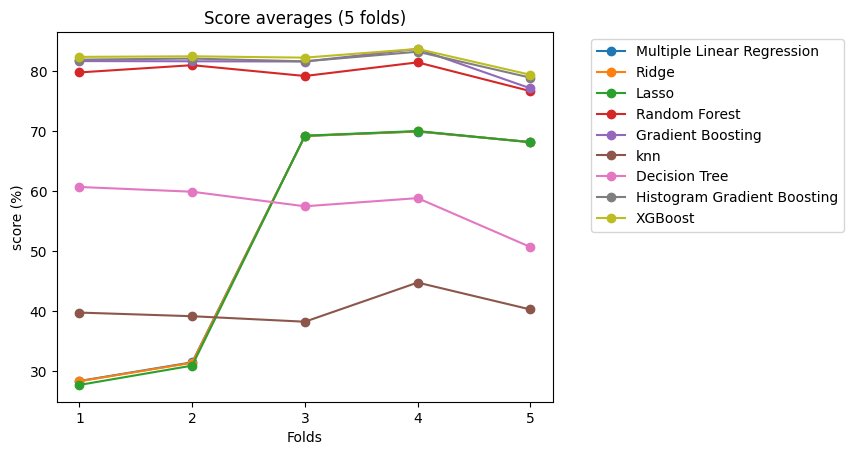

In [55]:
from matplotlib import pyplot as plt


def k_fold_score_linear_plot(df: pd.DataFrame, k_folds: int = 5):
    fig, ax = plt.subplots()

    for model, scores in df.items():
        ax.plot(range(1, k_folds + 1), scores * 100, marker='o', label=model)

    ax.set_xticks(range(1, k_folds + 1))

    ax.set_xlabel('Folds')
    ax.set_ylabel('score (%)')
    ax.set_title(f'Score averages ({k_folds} folds)')
    ax.legend(loc='upper right', bbox_to_anchor=(1.6, 1))

    plt.show()


k_fold_score_linear_plot(cross_val_df, k_folds=5)


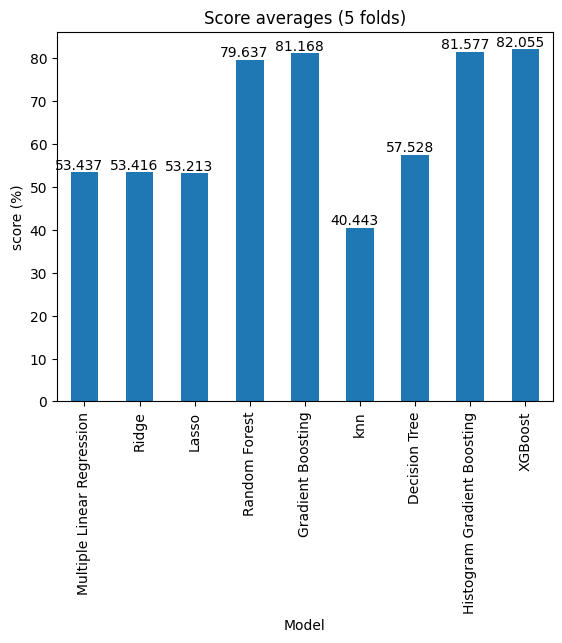

In [56]:
def score_mean_bar_plot(df: pd.DataFrame):
    average = df.mean() * 100

    fig, ax = plt.subplots()

    bars = average.plot(kind='bar', ax=ax)

    for bar in bars.patches:
        ax.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.005, round(bar.get_height(), 3),
                ha='center', va='bottom')

    ax.set_xlabel('Model')
    ax.set_ylabel('score (%)')
    ax.set_title(f'Score averages ({len(df)} folds)')

    plt.show()


score_mean_bar_plot(cross_val_df)